#Sentiment prediction model using NLP on messages from reviews.

**Bibliography:**


*   10 Tasks With NLP: Twitter Sentiment Analysis, https://medium.com/swlh/10-tasks-with-nlp-twitter-sentiment-analysis-fb1a2757d91f


*   How To Build and Deploy an NLP Model with FastAPI: Part 1, https://towardsdatascience.com/how-to-build-and-deploy-an-nlp-model-with-fastapi-part-1-9c1c7030d40


*   A Step-by-Step NLP Machine Learning Classifier Tutorial, https://builtin.com/machine-learning/nlp-machine-learning


*   5 Techniques to work with Imbalanced Data in Machine Learning, https://towardsdatascience.com/5-techniques-to-work-with-imbalanced-data-in-machine-learning-80836d45d30c


*   Under-sampling methods, https://imbalanced-learn.org/stable/references/under_sampling.html


*   Portuguese Tweets - nltk and sklearn, https://www.kaggle.com/code/leonardoassis/portuguese-tweets-nltk-and-sklearn

*   Generating Word Cloud in Python, https://www.geeksforgeeks.org/generating-word-cloud-python/

*   Translators, https://github.com/UlionTse/translators

*   Language Translation Using Python, https://towardsdatascience.com/language-translation-using-python-bd8020772ccc

*   How to Deploy Machine Learning Models with Python & Streamlit?, https://365datascience.com/tutorials/machine-learning-tutorials/how-to-deploy-machine-learning-models-with-python-and-streamlit/

+   Deploying ML Models using Streamlit, https://towardsdatascience.com/deploying-ml-models-using-streamlit-5d6212453bdd

*   How To Build and Deploy an NLP Model with FastAPI: Part 2, https://towardsdatascience.com/how-to-build-and-deploy-an-nlp-model-with-fastapi-part-2-e63a3eac71ad



#Import of necessary libraries:

Plotting, dataframe manipulation:

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

Machine Learning dependencies:

In [ ]:
# sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB # classifier 
from sklearn.metrics import (accuracy_score,  classification_report,  plot_confusion_matrix,)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
# text preprocessing modules
from string import punctuation

# text preprocessing modules
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re #regular expression

# Download dependency
for dependency in (
    "brown",
    "names",
    "wordnet",
    "averaged_perceptron_tagger",
    "universal_tagset",
    "stopwords",
    "omw-1.4",
):
    nltk.download(dependency)
    
import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

#imblearn for undersampling
from imblearn.under_sampling import RandomUnderSampler

#Word Cloud
from wordcloud import WordCloud, STOPWORDS

from nltk.probability import FreqDist
from nltk.metrics import ConfusionMatrix

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Translation modules:

In [ ]:
pip install --upgrade translators &> /dev/null # "&> /dev/null" is used so that the installation process does not display output text, as it is extensive.

In [ ]:
import translators as ts
import translators.server as tss

Using state Nevada server backend.


#Functions

For Word cloud generation:

In [ ]:
def WordCloudPlott(dataset_words, title):
# Python program to generate WordCloud translated
  comment_words = ''
  stopwords = set(STOPWORDS)


  # iterate through the csv file
  for val in dataset_words.values:
      
      # typecaste each val to string
      val = str(val)
  
      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      comment_words += " ".join(tokens)+" "


  
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='black',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  
  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.title(title, fontsize= 22 )
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()

Cleaning of text:

In [ ]:
def text_cleaning(text, remove_stop_words=True, lemmatize_words=True, lang='portuguese'):
    stop_words =  stopwords.words(lang)
    # Clean the text, with the option to remove stop_words and to lemmatize word
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text =  re.sub(r'http\S+',' link ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
        
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if lemmatize_words:
        text = text.split()
        lemmatizer = WordNetLemmatizer() 
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
    # create a count vectorizer object
    
    # Return a list of words
    return(text)

Extraction of common words:

In [ ]:
def _get_freq_dist_list(dataset_words):
    ls = []
    # Python program to generate WordCloud translated
    comment_words = ''
    stopwords = set(STOPWORDS)


    # iterate through the csv file
    for val in dataset_words.values:
        
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        for tk_line in tokens:
          #for word in tk_line:
          ls.append(tk_line)

    return ls

Histogram plot of common words:

In [ ]:
def Plot_Common_words(dataset_words, title, lang='portuguese'):
    # Frequency Distribution on training dataset
    fd_list = _get_freq_dist_list(dataset_words)
    fdist = FreqDist(fd_list)
    #print(fdist)

    # most common words
    most_common = fdist.most_common(25)
    #print(most_common)

    # most uncommon words (words that appear once)
    most_uncommon = fdist.hapaxes()
    #print(most_uncommon[0:30])

    # find the word occuring max number of times
    #print(fdist.max())
    data={'Word' : [k for k, v in most_common],
          'Count' : [v for k, v in most_common]}
    series=pd.DataFrame(data)
    if lang=='english':
      series.Word.iloc[:30]= series.Word.iloc[:30].apply(lambda x: tss.reverso(x, from_language='pt', to_language='en', if_ignore_empty_query=True, if_ignore_limit_of_length=True, limit_of_length=5000))

    #Plot:
    plt.figure(figsize = (20,8), facecolor='black')
    sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
    plot = sns.barplot(x  = series.iloc[:30].Word, y = series.iloc[:30].Count, palette= "jet_r")#, backcolor='black')

    for item in plot.get_xticklabels():
        item.set_rotation(20)
        item.set_size(14)
        item.set_color('white')
   
    for item in plot.get_yticklabels():
        item.set_color('white')
        item.set_size(14)

    plt.title(title+'\n', fontsize= 22, color='white')
    #plt.grid(False)



    plt.show()

#Uploading Datasets

In [ ]:
Order_reviews_df = pd.read_csv('https://raw.githubusercontent.com/Astroprogramm/PF-E-commerce-Olist/master/Datasets/olist_order_reviews_dataset.csv')
Order_items_df = pd.read_csv('https://raw.githubusercontent.com/Astroprogramm/PF-E-commerce-Olist/master/Datasets/olist_order_items_dataset.csv')
Products_df = pd.read_csv('https://raw.githubusercontent.com/Astroprogramm/PF-E-commerce-Olist/master/Datasets/olist_products_dataset.csv')

#Preparing data

In [ ]:
display(Order_reviews_df.head(5))
display(Order_reviews_df.tail(5))

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49


In [ ]:
Order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
Order_reviews_df.shape

(99224, 7)

In [ ]:
print("There are",Order_reviews_df.shape[0] - 58247,"reviews with messages,",np.round((Order_reviews_df.shape[0] - 58247)*100/Order_reviews_df.shape[0], 0),"% data available from the total content in the dataset.")

There are 40977 reviews with messages, 41.0 % data available from the total content in the dataset.


From the cell above we see that we have 41% of available data,that is 40977 messages reviewing products. It's a good amount for analysis. 

Now, I'll choose the features for analysis.

First I'll drop the columns that describe the product in size, the quality of the photo and weight. I'll drop the answer time to the review.

In [ ]:
Order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
Order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
Products_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
Products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Now, I'll join all the dataframes to give a complete result for the user, like product, category of product and date of sell.

In [ ]:
Dataset_0 = pd.merge(Order_reviews_df, Order_items_df, how='left', on='order_id', sort=False, validate="many_to_many")
Dataset_0

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113126,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,1.0,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,2018-07-02 17:30:37,226.77,61.20
113127,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,1.0,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,2017-12-07 22:08:00,199.99,9.77
113128,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,1.0,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-03-22 10:08:04,215.97,15.59
113129,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,1.0,73a7fbf8c1048131f3b531af31bcdf0e,8d956fec2e4337affcb520f56fd8cbfd,2018-06-26 18:15:29,50.95,15.46


In [ ]:
Dataset_0.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       99608
review_comment_message     64965
review_creation_date           0
review_answer_timestamp        0
order_item_id                759
product_id                   759
seller_id                    759
shipping_limit_date          759
price                        759
freight_value                759
dtype: int64

In [ ]:
Dataset = pd.merge(Dataset_0, Products_df, how='left', on='product_id', sort=False)
Dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,79.79,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,149.00,45.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,...,179.99,42.85,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113126,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,1.0,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,...,226.77,61.20,moveis_decoracao,56.0,623.0,1.0,7250.0,100.0,25.0,25.0
113127,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,1.0,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,...,199.99,9.77,brinquedos,51.0,465.0,1.0,2363.0,23.0,27.0,19.0
113128,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,1.0,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,...,215.97,15.59,papelaria,45.0,283.0,3.0,4100.0,40.0,37.0,29.0
113129,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,1.0,73a7fbf8c1048131f3b531af31bcdf0e,8d956fec2e4337affcb520f56fd8cbfd,...,50.95,15.46,esporte_lazer,58.0,998.0,5.0,600.0,16.0,10.0,11.0


First, I want to check how much data is available for this study case.

In [ ]:
Dataset.isnull().sum()

review_id                     0
order_id                      0
review_score                  0
review_comment_title      36551
review_comment_message        0
review_creation_date          0
order_item_id               524
product_id                  524
seller_id                   524
shipping_limit_date         524
price                       524
product_category_name      1231
dtype: int64

In [ ]:
Dataset.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [ ]:
Dataset.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty','product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'review_answer_timestamp', 'freight_value'] , inplace=True)
Dataset.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'product_category_name'],
      dtype='object')

In [ ]:
Dataset.isnull().sum()

review_id                     0
order_id                      0
review_score                  0
review_comment_title      98938
review_comment_message    64730
review_creation_date          0
order_item_id                 0
product_id                    0
seller_id                     0
shipping_limit_date           0
price                         0
product_category_name      1598
dtype: int64

In [ ]:
categories = ['review_score', 'review_comment_message'] #, 'review_creation_date','order_id']
Message_review = Order_reviews_df.loc[:,categories]

In [ ]:
#Message_review['Producto'] = np.where(Order_items_df.order_id.reset_index(drop=True) == Message_review.order_id.reset_index(drop=True), Order_items_df.product_id)

I'll drop nulls

In [ ]:
Message_review.dropna(inplace=True)
Message_review.reset_index(inplace=True, drop=True)

In [ ]:
Dataset.dropna(subset=['review_comment_message'], inplace=True)
Dataset.reset_index(inplace=True, drop=True)

We verify that the changes have been applied

In [ ]:
Dataset.isnull().sum()

review_id                     0
order_id                      0
review_score                  0
review_comment_title      36551
review_comment_message        0
review_creation_date          0
order_item_id               524
product_id                  524
seller_id                   524
shipping_limit_date         524
price                       524
product_category_name      1231
dtype: int64

In [ ]:
Dataset.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,ferramentas_jardim
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,2018-02-15 15:48:21,1199.00,esporte_lazer
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,1.0,61a4100ccd6d9c4c808a1fd954ddb8ad,05ff92fedb5be47920fea08e501238b9,2018-05-17 10:31:31,586.56,eletroportateis
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,1.0,acffe5d7cd56e6b564cf6841486644ff,db4350fd57ae30082dec7acbaacc17f9,2018-02-16 16:27:39,35.00,beleza_saude
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,1.0,6871a3c157d6f51697e887f3c3598479,974cf2cb8f4b7add98709c30df02fe10,2018-05-24 18:31:29,89.99,informatica_acessorios


Now, to encode the target feature: 3 or superior will be considered as a positive review, below 3 a negative review.

In [ ]:
Dataset['target'] = np.where(Dataset.loc[:,('review_score')] >=3, 1, 0)
Dataset.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name,target
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,ferramentas_jardim,1
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,2018-02-15 15:48:21,1199.00,esporte_lazer,1
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,1.0,61a4100ccd6d9c4c808a1fd954ddb8ad,05ff92fedb5be47920fea08e501238b9,2018-05-17 10:31:31,586.56,eletroportateis,1
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,1.0,acffe5d7cd56e6b564cf6841486644ff,db4350fd57ae30082dec7acbaacc17f9,2018-02-16 16:27:39,35.00,beleza_saude,1
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,1.0,6871a3c157d6f51697e887f3c3598479,974cf2cb8f4b7add98709c30df02fe10,2018-05-24 18:31:29,89.99,informatica_acessorios,1


We verify that target contains only 0 or 1:

In [ ]:
Dataset.target.unique()

array([1, 0])

Now, verify that target was assigned correctly specially in score equal 3.

In [ ]:
Dataset[Dataset.review_score == 3]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name,target
37,8b230a1373c6dc4bd867099fda1d7039,071251fe3b3493294536f03737a8a679,3,NaN,Eu comprei duas unidades e só recebi uma e ago...,2017-11-09 00:00:00,1.0,d2085f7e0f9533605386960fc7e987ec,aac29b1b99776be73c3049939652091d,2017-11-06 02:56:07,12.49,ferramentas_jardim,1
38,8b230a1373c6dc4bd867099fda1d7039,071251fe3b3493294536f03737a8a679,3,NaN,Eu comprei duas unidades e só recebi uma e ago...,2017-11-09 00:00:00,2.0,d2085f7e0f9533605386960fc7e987ec,aac29b1b99776be73c3049939652091d,2017-11-06 02:56:07,12.49,ferramentas_jardim,1
39,cb2fc3e5711b5ae85e0491ee18af63ed,34e6d418f368f8079ae152bc178bc66a,3,NaN,"Produto bom, porém o que veio para mim não con...",2018-01-31 00:00:00,1.0,8215db96a612d69839c27866feabf350,c794dab4928dd97beb41d05514441e86,2018-01-18 19:54:25,33.80,beleza_saude,1
44,0bd4dcc4f6c4621baf37f73495cad8c4,a11cd01ac67beef7e8bf09740d8a35c1,3,NaN,Entrega no prazo,2017-03-23 00:00:00,1.0,ee92961b88199a0d4329a6beca8f63da,78c99c6dff4eeae5be99bf635ed21e3f,2017-03-16 18:29:46,39.90,esporte_lazer,1
45,0bd4dcc4f6c4621baf37f73495cad8c4,a11cd01ac67beef7e8bf09740d8a35c1,3,NaN,Entrega no prazo,2017-03-23 00:00:00,2.0,ee92961b88199a0d4329a6beca8f63da,78c99c6dff4eeae5be99bf635ed21e3f,2017-03-16 18:29:46,39.90,esporte_lazer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48154,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \r\nDas 6 unidades compradas só recebi...,2018-06-05 00:00:00,3.0,a62e25e09e05e6faf31d90c6ec1aa3d1,634964b17796e64304cadf1ad3050fb7,2018-05-25 16:14:55,105.00,relogios_presentes,1
48155,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \r\nDas 6 unidades compradas só recebi...,2018-06-05 00:00:00,4.0,a62e25e09e05e6faf31d90c6ec1aa3d1,634964b17796e64304cadf1ad3050fb7,2018-05-25 16:14:55,105.00,relogios_presentes,1
48156,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \r\nDas 6 unidades compradas só recebi...,2018-06-05 00:00:00,5.0,a62e25e09e05e6faf31d90c6ec1aa3d1,634964b17796e64304cadf1ad3050fb7,2018-05-25 16:14:55,105.00,relogios_presentes,1
48157,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \r\nDas 6 unidades compradas só recebi...,2018-06-05 00:00:00,6.0,a62e25e09e05e6faf31d90c6ec1aa3d1,634964b17796e64304cadf1ad3050fb7,2018-05-25 16:14:55,105.00,relogios_presentes,1


In [ ]:
Dataset.target.value_counts()

1    33844
0    14322
Name: target, dtype: int64

In [ ]:
print("The relationship between the two classes is", round(14322*100/Dataset.shape[0],0),"% for class 0 and", round(33844*100/Dataset.shape[0],0),"%for class 1")

The relationship between the two classes is 30.0 % for class 0 and 70.0 %for class 1


We can see the data is unbalanced. I'll do undersampling on data from class 1, as I will have 21780 messages remaining, a good amount for analysis.

RandomUnderSampler from imblearn will be used for this task to choose data randomly. This will be done after cleaning the data.


Now, I'll also translate some messages to English to check differences in the model performance.

In [ ]:
Message_review['Message_English'] = Message_review.loc[0:4000,'review_comment_message'].apply(lambda x: tss.reverso(x, from_language='pt', to_language='en', if_ignore_empty_query=True, if_ignore_limit_of_length=True, limit_of_length=5000))

#Data cleaning

First I'll test that cleaning and preparing of the text is done correctly in the dataset

In [ ]:
#clean the review
Dataset["cleaned_review_portuguese"] = Dataset.review_comment_message.apply(text_cleaning)
#Message_review["cleaned_review_english"] = Message_review.loc[0:4000,'Message_English'].apply(lambda x:text_cleaning(x,lang='english'))

In [ ]:
display(Dataset)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name,target,cleaned_review_portuguese
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,ferramentas_jardim,1,Recebi bem ante prazo estipulado
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,2018-02-15 15:48:21,1199.00,esporte_lazer,1,Parab n lojas lannister adorei comprar Interne...
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,1.0,61a4100ccd6d9c4c808a1fd954ddb8ad,05ff92fedb5be47920fea08e501238b9,2018-05-17 10:31:31,586.56,eletroportateis,1,aparelho eficiente site marca aparelho impress...
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,1.0,acffe5d7cd56e6b564cf6841486644ff,db4350fd57ae30082dec7acbaacc17f9,2018-02-16 16:27:39,35.00,beleza_saude,1,Mas pouco travando valor ta Boa
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,1.0,6871a3c157d6f51697e887f3c3598479,974cf2cb8f4b7add98709c30df02fe10,2018-05-24 18:31:29,89.99,informatica_acessorios,1,Vendedor confi vel produto ok entrega ante prazo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48161,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,NaN,para este produto recebi de acordo com a compr...,2017-11-29 00:00:00,1.0,0bdd9a52d192d64770e33ae559512478,6560211a19b47992c3666cc44a7e94c0,2017-11-24 20:16:22,55.00,relogios_presentes,1,produto recebi acordo compra realizada
48162,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,1.0,b5e2d4b3fa2f9ecad4c1df951afcc8ce,432c37c9dfba871172ec162e20118b8c,2018-02-08 16:00:30,160.00,esporte_lazer,1,Entregou dentro prazo O produto chegou condi e...
48163,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,1.0,79da264732f717f10ebf5d102aa6c32a,562fc2f2c2863ab7e79a9e4388a58a14,2018-05-18 17:31:40,29.99,telefonia,1,O produto n enviado NF n existe venda NF certe...
48164,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,1.0,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-03-22 10:08:04,215.97,papelaria,1,Excelente mochila entrega super r pida Super r...


#Word cloud

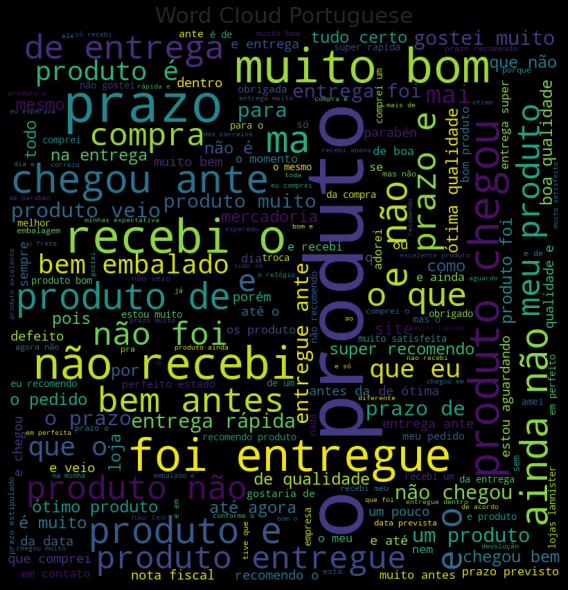

In [ ]:
WordCloudPlott(Dataset.review_comment_message.drop_duplicates(), title='Word Cloud Portuguese')

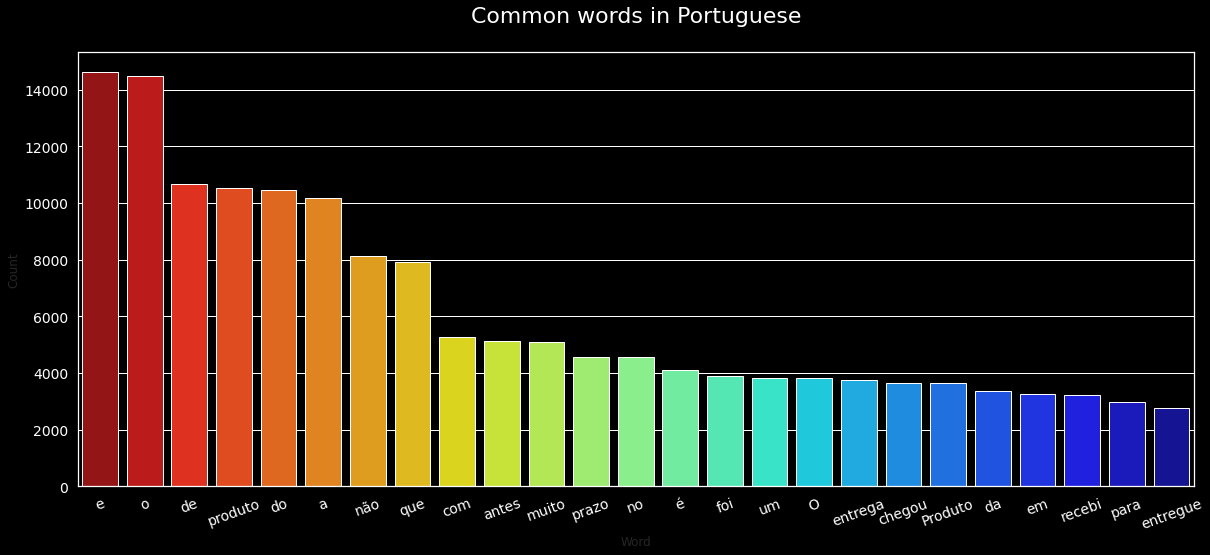

In [ ]:
Plot_Common_words(Dataset.review_comment_message.drop_duplicates(),  title='Common words in Portuguese')

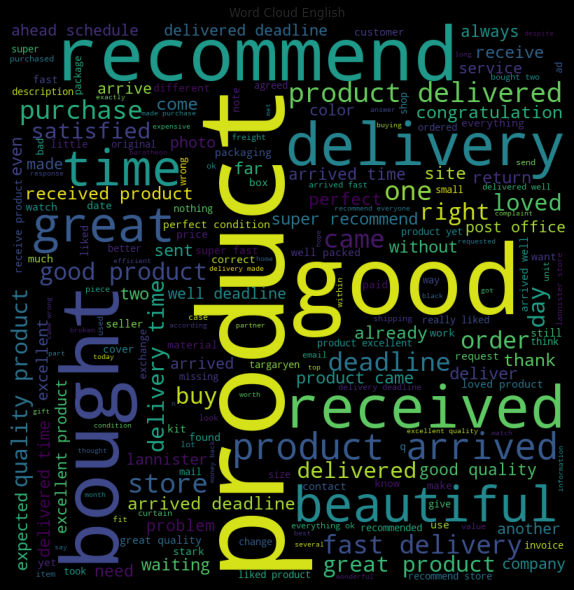

In [ ]:
WordCloudPlott(Message_review.loc[0:4000,'cleaned_review_english'], title='Word Cloud English')

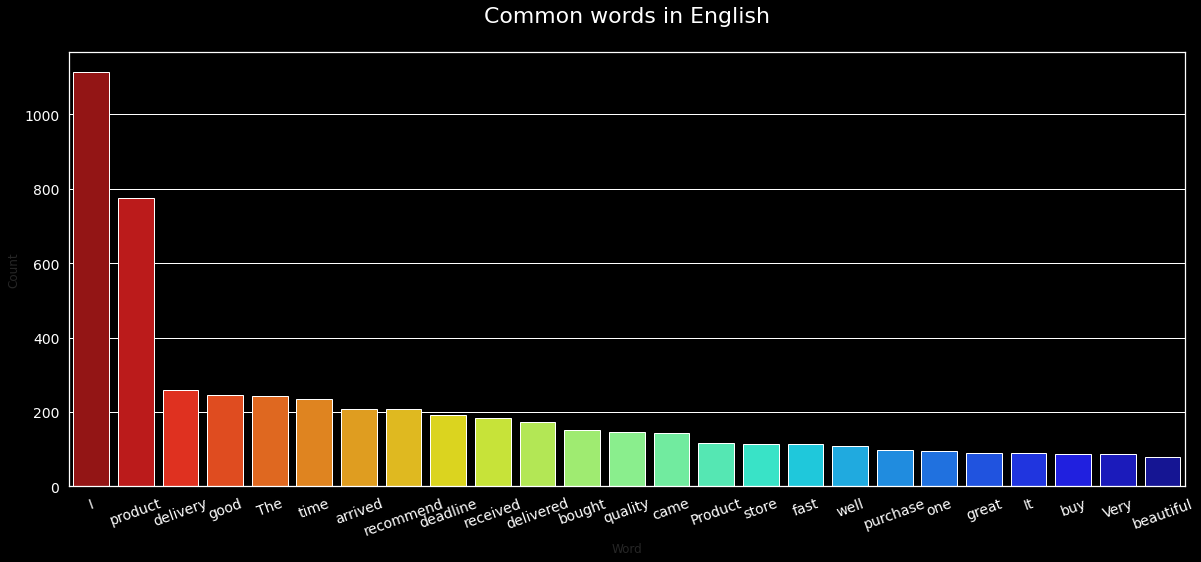

In [ ]:
Plot_Common_words(Message_review.loc[0:2000,'cleaned_review_english'],  title='Common words in English')

#Implementation of model

In [ ]:
Dataset_model = Dataset[~Dataset.review_comment_message.duplicated()]
Dataset_model

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name,target,cleaned_review_portuguese
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,ferramentas_jardim,1,Recebi bem ante prazo estipulado
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,2018-02-15 15:48:21,1199.00,esporte_lazer,1,Parab n lojas lannister adorei comprar Interne...
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,1.0,61a4100ccd6d9c4c808a1fd954ddb8ad,05ff92fedb5be47920fea08e501238b9,2018-05-17 10:31:31,586.56,eletroportateis,1,aparelho eficiente site marca aparelho impress...
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,1.0,acffe5d7cd56e6b564cf6841486644ff,db4350fd57ae30082dec7acbaacc17f9,2018-02-16 16:27:39,35.00,beleza_saude,1,Mas pouco travando valor ta Boa
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,1.0,6871a3c157d6f51697e887f3c3598479,974cf2cb8f4b7add98709c30df02fe10,2018-05-24 18:31:29,89.99,informatica_acessorios,1,Vendedor confi vel produto ok entrega ante prazo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48161,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,NaN,para este produto recebi de acordo com a compr...,2017-11-29 00:00:00,1.0,0bdd9a52d192d64770e33ae559512478,6560211a19b47992c3666cc44a7e94c0,2017-11-24 20:16:22,55.00,relogios_presentes,1,produto recebi acordo compra realizada
48162,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,1.0,b5e2d4b3fa2f9ecad4c1df951afcc8ce,432c37c9dfba871172ec162e20118b8c,2018-02-08 16:00:30,160.00,esporte_lazer,1,Entregou dentro prazo O produto chegou condi e...
48163,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,1.0,79da264732f717f10ebf5d102aa6c32a,562fc2f2c2863ab7e79a9e4388a58a14,2018-05-18 17:31:40,29.99,telefonia,1,O produto n enviado NF n existe venda NF certe...
48164,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,1.0,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-03-22 10:08:04,215.97,papelaria,1,Excelente mochila entrega super r pida Super r...


In [ ]:
X_pt = Dataset_model.review_comment_message
#X_en = Message_review.loc[:4000,'cleaned_review_english']

Setting target for model

In [ ]:
y_pt=Dataset_model.target
#y_en=Message_review.loc[:4000,'target']

Let's check shapes of every array created

In [ ]:
print('For portuguese:  X=',X_pt.shape,'y=',y_pt.shape)
#print('For english:     X=',X_en.shape,'y=',y_en.shape)

For portuguese:  X= (36159,) y= (36159,)


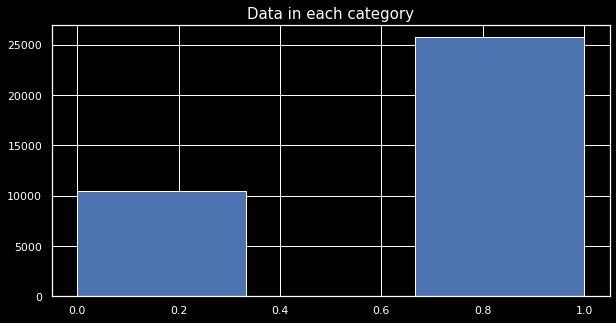

In [ ]:
y_pt.hist(bins=3, figsize=(10,5), grid=False)
plt.yticks(c='white')
plt.xticks(c='white')
plt.grid(c='white')
plt.title('Data in each category', c='white', size=15)
plt.show()

The classes will be balanced by perfomin undersampling with RandomUnderSampler from imblearn, to choose data randomly.

Now, to the model. First, spliting the data in test and validation:

In [ ]:
#Portuguese:
X_train_pt, X_valid_pt, y_train_pt, y_valid_pt = train_test_split(
    X_pt,
    y_pt,
    test_size=0.20,
    random_state=42,
    shuffle=True,
    stratify=y_pt,
    )
'''#English:
X_train_en, X_valid_en, y_train_en, y_valid_en = train_test_split(
    X_en,
    y_en,
    test_size=0.20,
    random_state=42,
    shuffle=True,
    stratify=y_en,
    )'''

'#English:\nX_train_en, X_valid_en, y_train_en, y_valid_en = train_test_split(\n    X_en,\n    y_en,\n    test_size=0.20,\n    random_state=42,\n    shuffle=True,\n    stratify=y_en,\n    )'

Prepare pipelines

In [ ]:
# Create a classifier in pipeline
from imblearn.pipeline import make_pipeline
sentiment_classifier_pt = make_pipeline(CountVectorizer(),RandomUnderSampler(), MultinomialNB())

# Create a classifier in pipeline
sentiment_classifier_en = Pipeline(steps=[
                               #('pre_processing',TfidfVectorizer(lowercase=False)),
                                 #('pre_procesing',TfidfTransformer()),
                                 ('naive_bayes',MultinomialNB())])

Train each model

In [ ]:
# train the sentiment classifier 
sentiment_classifier_pt.fit(X_train_pt,y_train_pt)
#sentiment_classifier_en.fit(X_train_en,y_train_en)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomundersampler', RandomUnderSampler()),
                ('multinomialnb', MultinomialNB())])

Test the model

In [ ]:
# test model performance on valid data 
y_preds_pt = sentiment_classifier_pt.predict(X_valid_pt)
#y_preds_en = sentiment_classifier_en.predict(X_valid_en)

In [ ]:
print('Accuracy score for model train with portuguese',accuracy_score(y_valid_pt,y_preds_pt))
#print('Accuracy score for model train with english',accuracy_score(y_valid_en,y_preds_en))

Accuracy score for model train with portuguese 0.8618639380530974


In [ ]:
#save model 
import joblib 
joblib.dump(sentiment_classifier_pt, 'sentiment_model_pt_pipeline.pkl')

['sentiment_model_pt_pipeline.pkl']